<a href="https://colab.research.google.com/github/shahulrashid/internship_tasks/blob/main/task4_Breast_Cancer_binaryclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [20]:
df=pd.read_csv("/content/drive/MyDrive/internship/data.csv")

In [21]:
# prompt: Choose a binary classification dataset.

# Display the first few rows of the DataFrame
print(df.head())

print(df.info())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [22]:
# Drop irrelevant columns
df = df.drop(columns=["id", "Unnamed: 32"])

In [23]:
# Encode the target label ('M' = 1, 'B' = 0)
df["diagnosis"] = LabelEncoder().fit_transform(df["diagnosis"])

In [24]:
# Split into features and target
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

In [25]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [26]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Fit a Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [28]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

In [30]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", report)

Accuracy: 97.37%
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [31]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
#Get predicted probabilities (if not already done)
y_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1
# Set a custom threshold
custom_threshold = 0.3
y_pred_custom = (y_proba >= custom_threshold).astype(int)

In [34]:
#Calculate confusion matrix, precision, and recall
cm_custom = confusion_matrix(y_test, y_pred_custom)
precision_custom = precision_score(y_test, y_pred_custom)
recall_custom = recall_score(y_test, y_pred_custom)

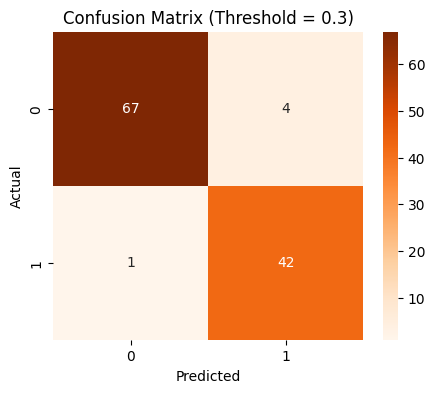

In [35]:
plt.figure(figsize=(5, 4))
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (Threshold = {custom_threshold})")
plt.show()

In [36]:
# Step 5: Print metrics
print(f"Precision: {precision_custom:.2f}")
print(f"Recall: {recall_custom:.2f}")

Precision: 0.91
Recall: 0.98


1. How does logistic regression differ from linear regression?
Logistic regression is used for classification problems, while linear regression is used for regression tasks. Linear regression predicts continuous numerical values, such as predicting house prices or temperature. In contrast, logistic regression predicts the probability that an input belongs to a particular class, such as whether an email is spam or not. The key difference lies in the output: linear regression outputs real numbers, whereas logistic regression outputs probabilities that are then mapped to class labels (usually using a threshold like 0.5). Additionally, logistic regression uses the sigmoid function to squash the output between 0 and 1, making it suitable for binary classification.

2. What is the sigmoid function?
The sigmoid function is a mathematical function commonly used in logistic regression to map any real-valued number into a value between 0 and 1. It is defined as
𝜎
(
𝑧
)
=
1
1
+
𝑒
−
𝑧
σ(z)=
1+e
−z

1
​
 , where
𝑧
z is the input (usually a linear combination of features and weights). This output can be interpreted as the probability of a data point belonging to the positive class. The sigmoid function is S-shaped and centered at 0, smoothly transitioning from 0 to 1, making it ideal for converting raw scores into probabilities in binary classification.

3. What is precision vs recall?
Precision and recall are evaluation metrics for classification models, especially useful in imbalanced datasets. Precision measures how many of the positive predictions made by the model are actually correct, and is calculated as
𝑇
𝑃
𝑇
𝑃
+
𝐹
𝑃
TP+FP
TP
​
 , where TP is true positives and FP is false positives. Recall, on the other hand, measures how many of the actual positive cases the model correctly identified, calculated as
𝑇
𝑃
𝑇
𝑃
+
𝐹
𝑁
TP+FN
TP
​
 , where FN is false negatives. High precision means few false positives, while high recall means few false negatives. Depending on the problem, you might prioritize one over the other.

4. What is the ROC-AUC curve?
The ROC-AUC curve is a graphical and numerical way to evaluate the performance of a binary classification model. The ROC (Receiver Operating Characteristic) curve plots the true positive rate (recall) against the false positive rate at various classification thresholds. The AUC (Area Under the Curve) is a single number that summarizes the overall ability of the model to distinguish between classes. An AUC close to 1.0 means excellent performance, while an AUC around 0.5 indicates no better than random guessing.

5. What is the confusion matrix?
A confusion matrix is a table that is used to describe the performance of a classification model. It shows the counts of correct and incorrect predictions broken down by each class. The four key components are: true positives (TP) — correctly predicted positives, true negatives (TN) — correctly predicted negatives, false positives (FP) — negatives wrongly predicted as positives, and false negatives (FN) — positives wrongly predicted as negatives. The matrix helps to see not just how many predictions were right or wrong, but also what types of errors were made.

6. What happens if classes are imbalanced?
When one class significantly outnumbers the other, the model may become biased toward predicting the majority class. This can lead to high accuracy but poor performance on the minority class, which is often the more important one (e.g., detecting fraud or disease). In such situations, metrics like precision, recall, F1-score, and ROC-AUC become more meaningful than accuracy. Techniques like resampling (oversampling the minority class or undersampling the majority class) and class weighting during training can help address this imbalance.

7. How do you choose the threshold?
The threshold is the cutoff point at which the model decides whether a predicted probability should be classified as positive or negative. By default, logistic regression uses 0.5, but this isn't always optimal. If you want to increase recall, you might lower the threshold to catch more positive cases. If you want to improve precision, you might raise the threshold to reduce false positives. The best threshold depends on the specific problem and can be chosen using tools like the ROC curve, precision-recall curve, or by maximizing the F1-score.

8. Can logistic regression be used for multi-class problems?
Yes, logistic regression can be extended to handle multi-class classification problems. One common approach is One-vs-Rest (OvR), where a separate binary classifier is trained for each class against all others. Another approach is multinomial logistic regression, which generalizes logistic regression by using the softmax function instead of the sigmoid. This allows the model to directly predict probabilities for each class in a single training process